## Usage notes
This toolkit works in the following order:

- Set up the input data
- Create model (SM, MOSM, CSM, SM-LMC, CG)
- Make an estimation of the model parameters using BNSE+SM
- Train the model parameters
- Set the prediction range
- Do a prediction

For example:
```
import mogptk

x, y = get_your_data()

data = mogptk.Data(x, y)
data.set_pred_range(0.0, 5.0, n=200)

mosm = mogptk.MOSM(data, Q=3)
mosm.estimate_params()
mosm.train()
mosm.predict()

data.plot()
```

In [142]:
# import library if it is not installed
import sys
sys.path.insert(0, '../')

import mogptk
import numpy as np

%reload_ext autoreload
%autoreload 2

import matplotlib as plt
plt.rcParams["figure.figsize"] = (12,8)

In [ ]:
x = {'X': [0.5, 2.5], 'Y': [4.0, 5.0]}
y = [4, 3]
data = mogptk.Data(x, y, x_labels=['X'], y_label='4')
print(data)
data.plot()

In [130]:
#data = mogptk.LoadCSV('data/jura.csv', ['X', 'Y'], 'Cd')
#data.remove_range(start=2.0, end=None)
#data.remove_randomly(pct=0.90)
#data.plot()

In [131]:
#import pandas as pd
#df = pd.DataFrame({'x': [0, 1, 2, 3, 4, 5, 6, 7, 8, 9], 'y': [3, 4, 4, 5, 5, 6, 7, 8, 9, 11]})
#data = mogptk.LoadDataFrame(df, 'x', 'y')
#data.plot()

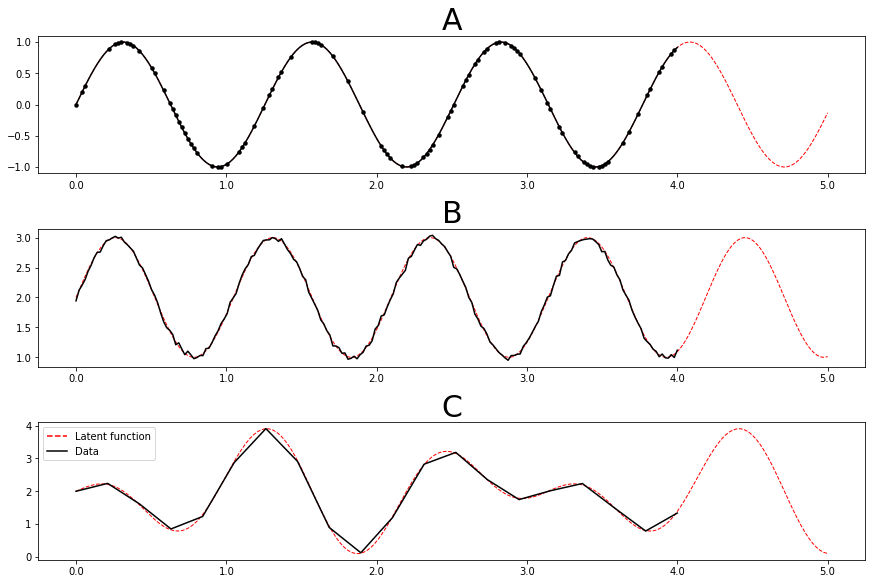

In [140]:
data = mogptk.DataSet()
data.append(mogptk.LoadFunction(lambda x: np.sin(5*x[:,0]), n=200, start=0.0, end=4.0, name='A'))
data.append(mogptk.LoadFunction(lambda x: np.sin(6*x[:,0])+2, n=200, start=0.0, end=4.0, var=0.03, name='B'))
data.append(mogptk.LoadFunction(lambda x: np.sin(6*x[:,0])+2 - np.sin(4*x[:,0]), n=20, start=0.0, end=4.0, var=0.03, name='C'))

data['A'].remove_randomly(pct=.5)

data.set_pred_range(0.0, 5.0, n=200)

data.plot();

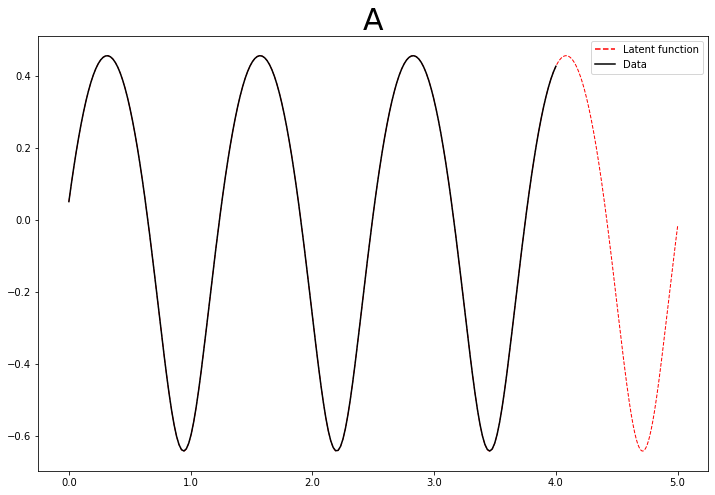

In [108]:
data[0].transform(mogptk.TransformLog)
data[0].plot()

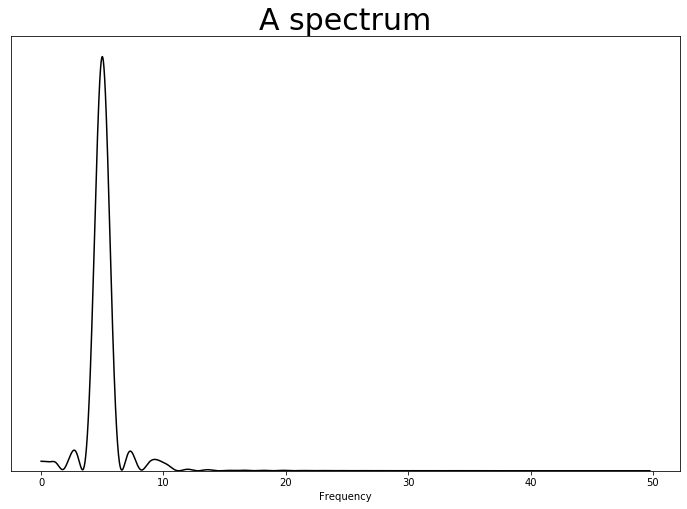

In [109]:
data[0].plot_spectrum()

In [112]:
sm = mogptk.SM(data, Q=3)
display(sm.get_params())

[{'num_mixtures': array(3, dtype=int32),
  'mixture_weights': array([-0.56319299,  1.54403474,  0.01314146]),
  'mixture_scales': array([[-2.10848654, -1.34838055,  1.5792796 ]]),
  'mixture_means': array([[ 2.22624234],
         [ 0.13991371],
         [-0.95080027]])}]

[{'num_mixtures': array(3, dtype=int32),
  'mixture_weights': array([2.71318998, 0.14695666, 0.13985336]),
  'mixture_scales': array([[0.17999601, 0.17046204, 0.26669211]]),
  'mixture_means': array([[0.78620724],
         [0.47769554],
         [1.12955091]])}]

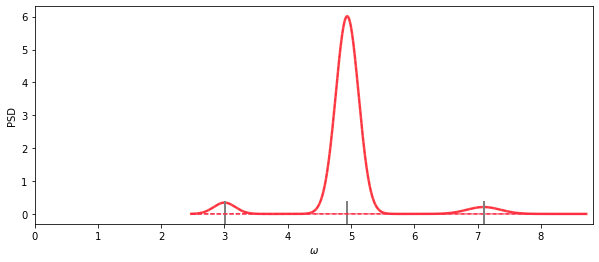

In [113]:
sm.estimate_params()
display(sm.get_params())
sm.plot_psd()

         Current function value: -1034.401112
         Iterations: 46
         Function evaluations: 80
         Gradient evaluations: 73
Done in 0.0 minutes


[{'num_mixtures': array(3, dtype=int32),
  'mixture_weights': array([1.39129626e-01, 1.43557901e-05, 2.58708444e-03]),
  'mixture_scales': array([[1.41969428e-06, 8.65195244e-06, 6.32807644e-01]]),
  'mixture_means': array([[0.79443752],
         [0.79440149],
         [1.13596923]])}]

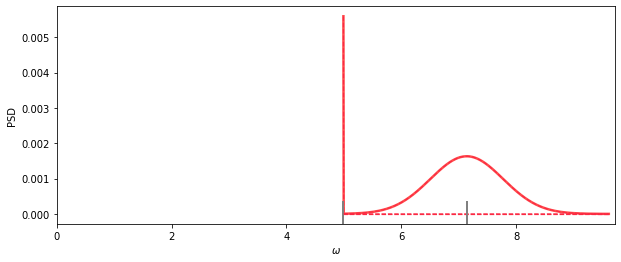

In [114]:
sm.train(method='BFGS')
display(sm.get_params())
sm.plot_psd()

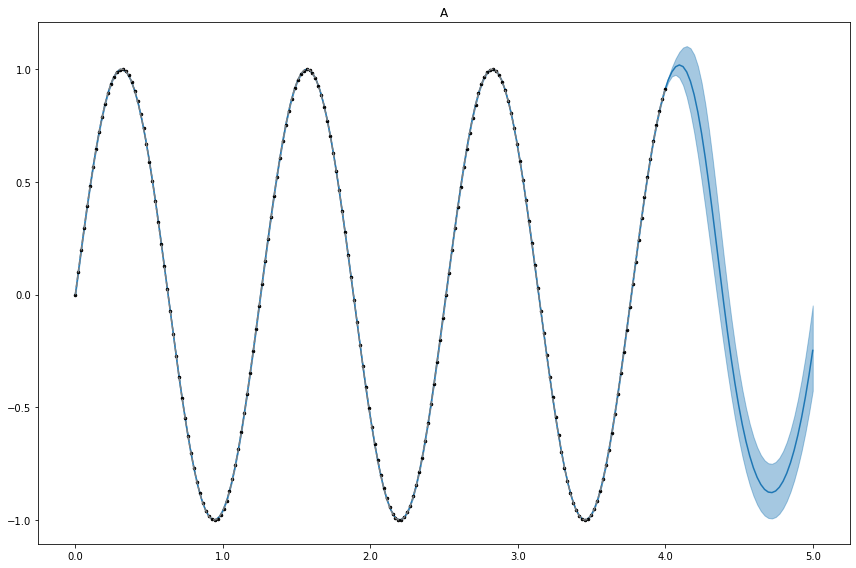

In [115]:
sm.predict(plot=True)

## MOSM

In [116]:
mosm = mogptk.MOSM(data, Q=3)
mosm.print_params()

Likelihood,variance
,1.0


In [117]:
mosm.estimate_params(method='SM')
mosm.print_params()

         Current function value: -1034.401112
         Iterations: 46
         Function evaluations: 80
         Gradient evaluations: 73
Done in 0.0 minutes


Likelihood,variance
,1.0


In [118]:
mosm.train()
mosm.print_params()

Done in 0.0 minutes


Likelihood,variance
,1e-06


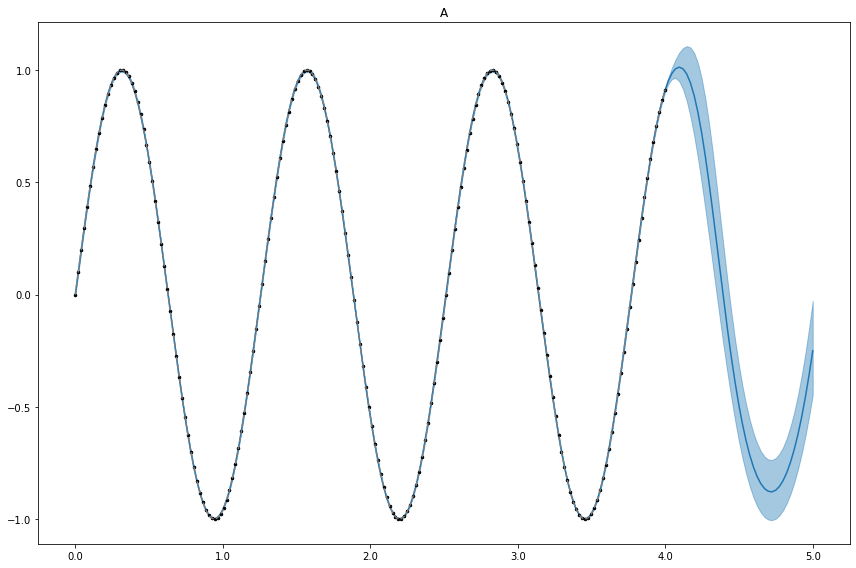

In [119]:
mosm.predict(plot=True)

### Plot

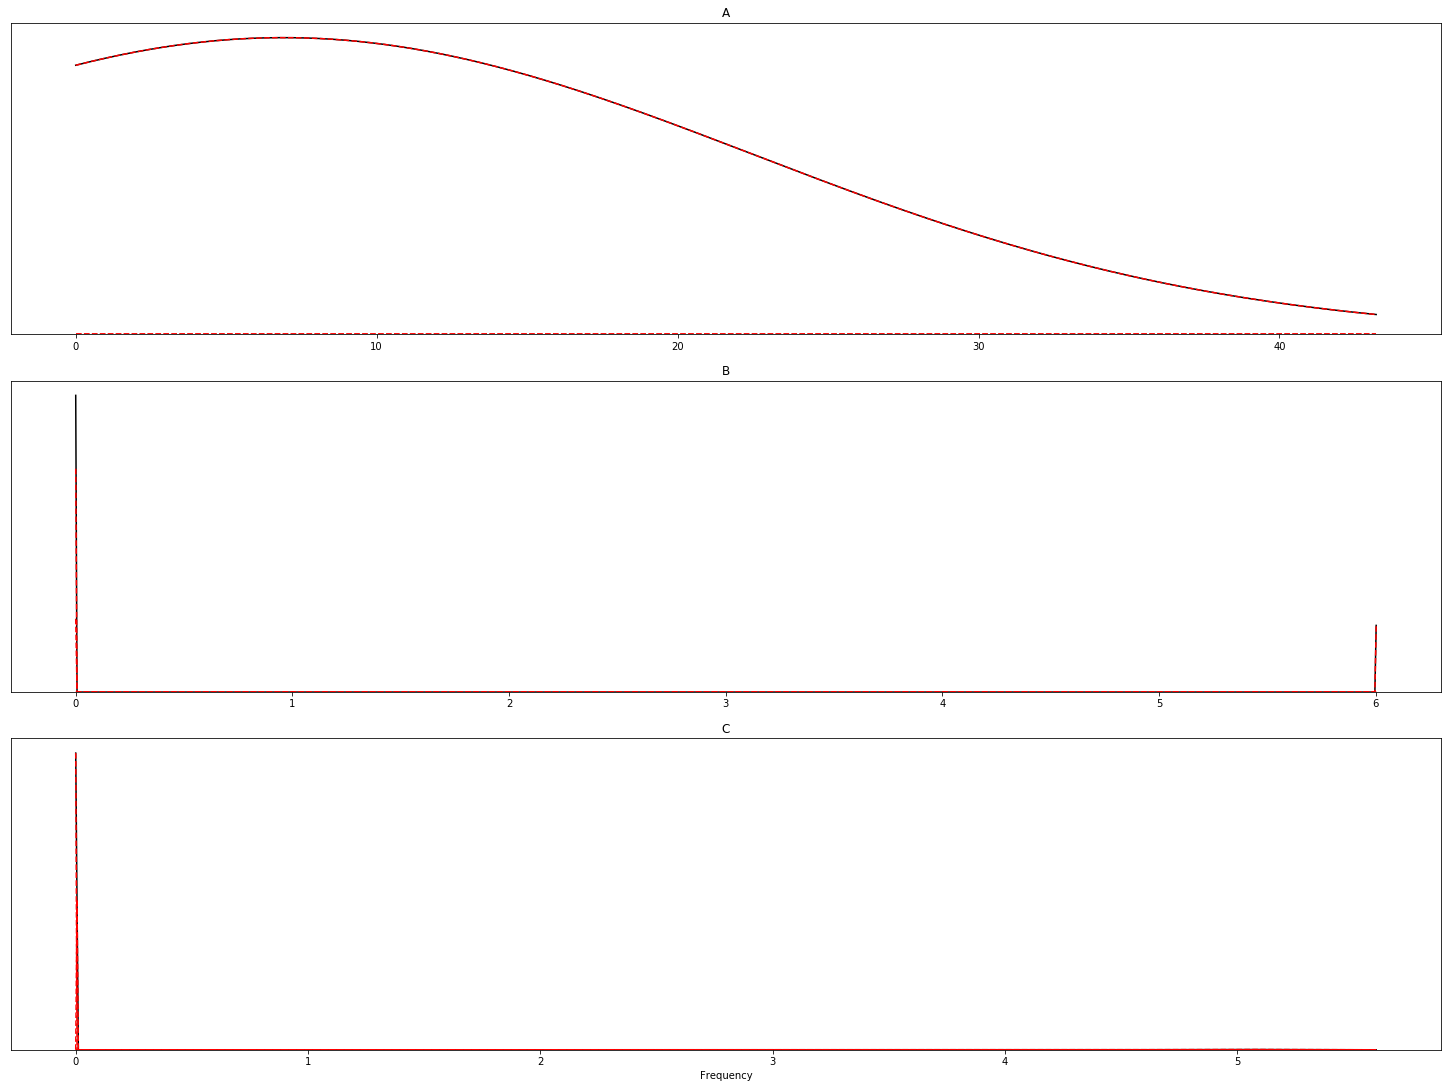

In [83]:
mosm.plot()

(<Figure size 1440x1008 with 9 Axes>,
 array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f820d746828>,
       dtype=object))

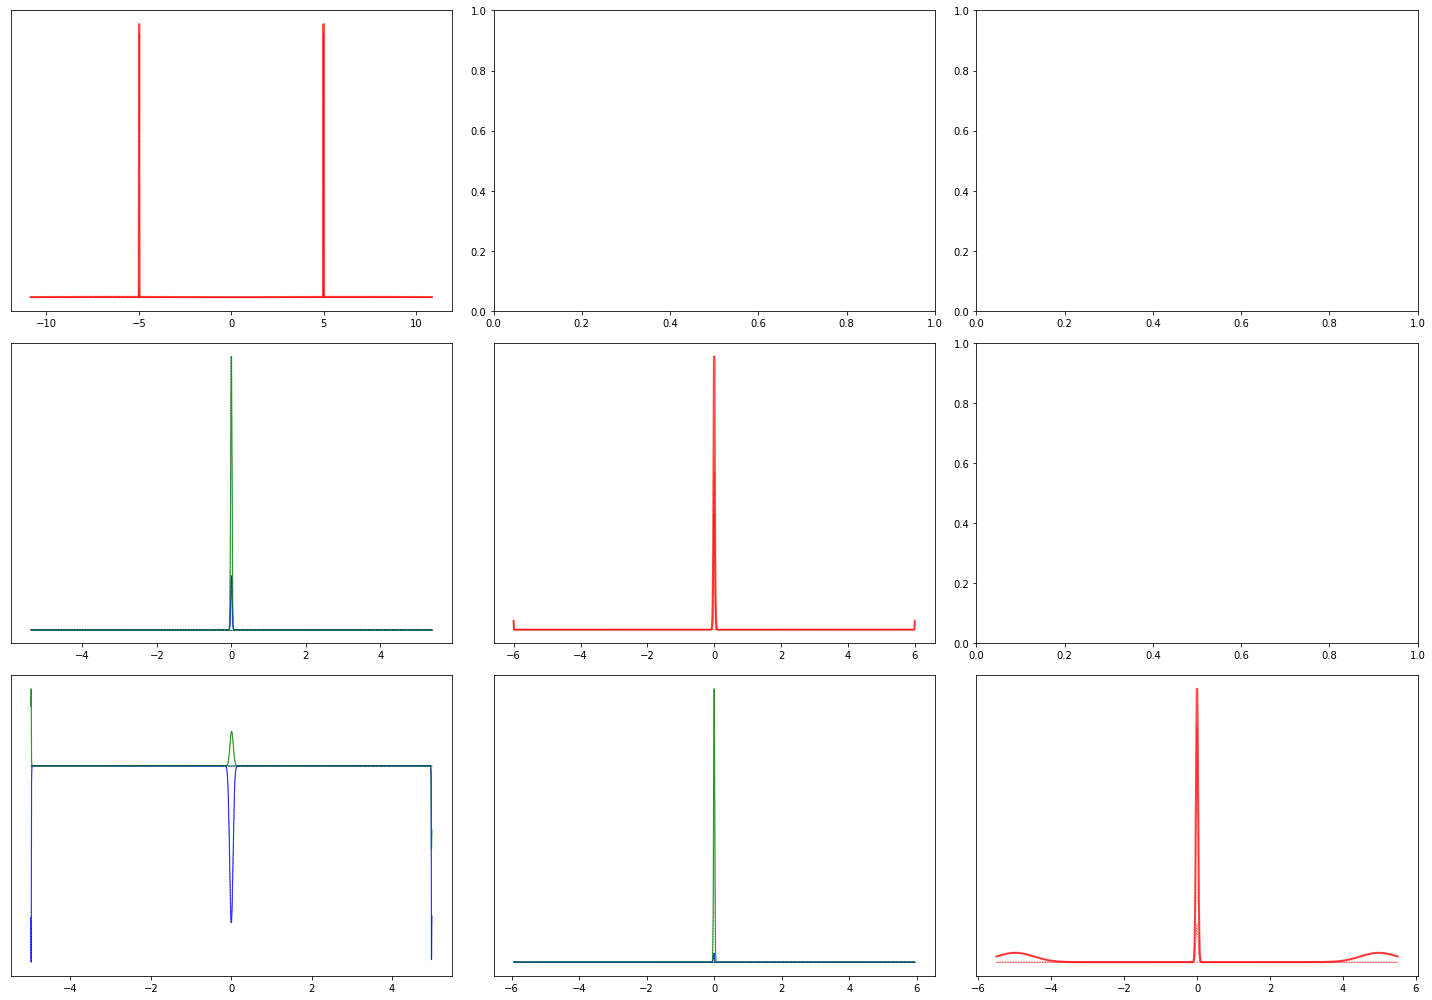

In [84]:
mosm.plot_psd()

(<Figure size 864x576 with 2 Axes>,
 array([[ 1.00000000e+00,  5.09519550e-05, -5.96952411e-03],
        [ 5.09519550e-05,  1.00000000e+00,  1.72700842e-02],
        [-5.96952411e-03,  1.72700842e-02,  1.00000000e+00]]))

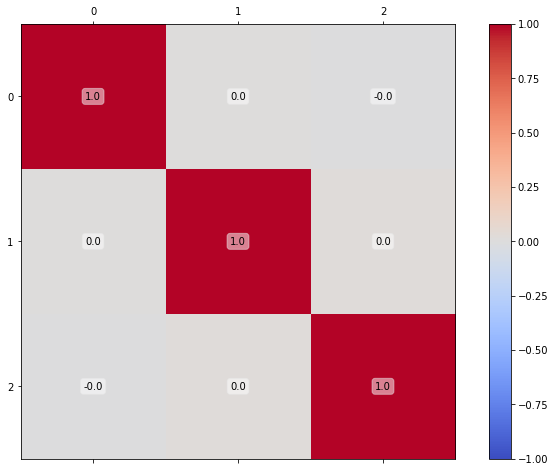

In [85]:
mosm.plot_correlations()

In [86]:
mosm.info()

‣ MOSM approaches RBF kernel for q=2 in channel='A'
‣ MOSM approaches RBF kernel for q=1 in channel='B'
‣ MOSM approaches RBF kernel for q=2 in channel='B'


### Saving and loading

In [87]:
mosm.save_params('mosm')
mosm.print_params()

Q=0,magnitude,mean,variance,delay,phase
A,5.012,[4.992],[4.662e-06],[0.000],0.000
B,12.895,[6.002],[7.414e-06],[0.000],0.000
C,2.052,[0.005],[0.001],[0.000],0.000
Q=1,magnitude,mean,variance,delay,phase
A,-0.090,[4.982],[1.731e-05],[-0.039],-0.008
B,30.463,[6.283e-06],[0.001],[4.412e-10],0.000
C,1.398,[4.987],[0.263],[0.039],0.008
Q=2,magnitude,mean,variance,delay,phase
A,-0.016,[6.900],[15.610],[0.958],0.656
B,27.250,[6.285e-06],[0.000],[-0.969],-1.100


Likelihood,variance
,1e-06


In [88]:
mosm2 = mogptk.MOSM(data, Q=3)
mosm2.load_params('mosm')
mosm2.print_params()

Q=0,magnitude,mean,variance,delay,phase
A,5.012,[4.992],[4.662e-06],[0.000],0.000
B,12.895,[6.002],[7.414e-06],[0.000],0.000
C,2.052,[0.005],[0.001],[0.000],0.000
Q=1,magnitude,mean,variance,delay,phase
A,-0.090,[4.982],[1.731e-05],[-0.039],-0.008
B,30.463,[6.283e-06],[0.001],[4.412e-10],0.000
C,1.398,[4.987],[0.263],[0.039],0.008
Q=2,magnitude,mean,variance,delay,phase
A,-0.016,[6.900],[15.610],[0.958],0.656
B,27.250,[6.285e-06],[0.000],[-0.969],-1.100


Likelihood,variance
,1e-06


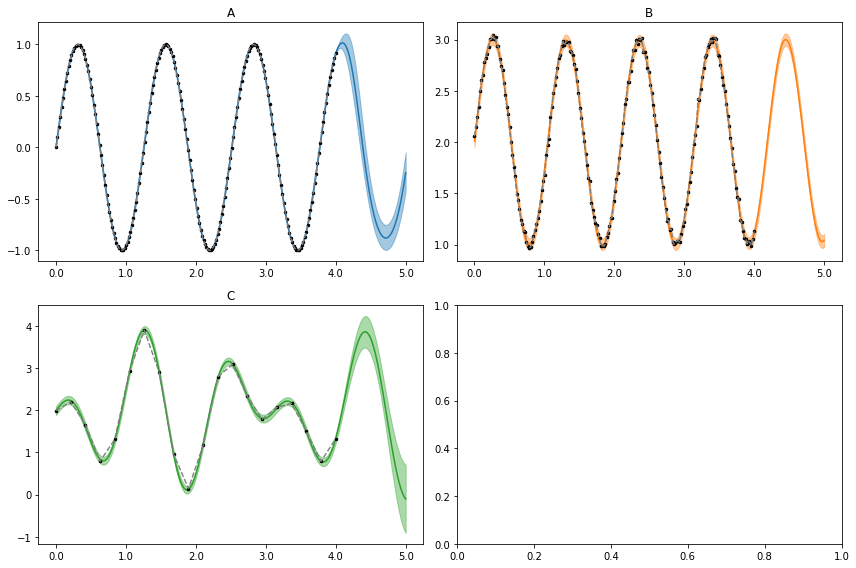

In [89]:
mosm2.predict(plot=True)

## SM-LMC

In [93]:
smlmc = mogptk.SM_LMC(data, Q=3, Rq=1)
smlmc.print_params()

[{'constant': array([[1.28628522, 0.69181601, 0.73881176]]), 'mean': array([0.45932778]), 'variance': array([0.50709548])}, {'constant': array([[ 0.57339613, -0.01349784,  0.62309913]]), 'mean': array([0.00840668]), 'variance': array([0.40190307])}, {'constant': array([[-1.33017025,  0.2690904 ,  0.0890746 ]]), 'mean': array([0.83634406]), 'variance': array([0.93229941])}, {'noise': array([0.80506817, 0.19116017, 0.02597193])}]


Q=0,constant,mean,variance
A,[1.286],[0.459],[0.507]
B,[0.692],[0.459],[0.507]
C,[0.739],[0.459],[0.507]
Q=1,constant,mean,variance
A,[0.573],[0.008],[0.402]
B,[-0.013],[0.008],[0.402]
C,[0.623],[0.008],[0.402]
Q=2,constant,mean,variance
A,[-1.330],[0.836],[0.932]
B,[0.269],[0.836],[0.932]


Likelihood,variance
,1.0


In [94]:
smlmc.estimate_params(method='BNSE')
smlmc.print_params()

[{'constant': array([[0.44504582, 1.1319831 , 1.23310522]]), 'mean': array([4.83341686]), 'variance': array([0.22320596])}, {'constant': array([[0.11626691, 1.26294233, 1.17960107]]), 'mean': array([3.95658007]), 'variance': array([0.34764033])}, {'constant': array([[0.12649243, 1.3214447 , 1.11255722]]), 'mean': array([3.8911695]), 'variance': array([0.54015032])}, {'noise': array([0.00476431, 0.01680253, 0.0275854 ])}]


Q=0,constant,mean,variance
A,[0.445],[4.833],[0.223]
B,[1.132],[4.833],[0.223]
C,[1.233],[4.833],[0.223]
Q=1,constant,mean,variance
A,[0.116],[3.957],[0.348]
B,[1.263],[3.957],[0.348]
C,[1.180],[3.957],[0.348]
Q=2,constant,mean,variance
A,[0.126],[3.891],[0.540]
B,[1.321],[3.891],[0.540]


Likelihood,variance
,1.0


In [95]:
smlmc.train()
smlmc.print_params()

Done in 0.3 minutes


Q=0,constant,mean,variance
A,[-0.016],[2.190],[2.005]
B,[3.405],[2.190],[2.005]
C,[3.360],[2.190],[2.005]
Q=1,constant,mean,variance
A,[-0.111],[0.082],[3.242]
B,[0.362],[0.082],[3.242]
C,[-0.966],[0.082],[3.242]
Q=2,constant,mean,variance
A,[0.341],[0.592],[18.609]
B,[-0.021],[0.592],[18.609]


Likelihood,variance
,1.000799328825032e-06


ERROR:tensorflow:==================================
Object was never used (type <class 'tensorflow.python.framework.ops.Tensor'>):
<tf.Tensor 'SpectralMixtureLMC-22d5dd6a-1063/constant/IsVariableInitialized:0' shape=() dtype=bool>
If you want to mark it as used call its "mark_used()" method.
It was originally created here:
  File "/home/taco/anaconda3/envs/py36/lib/python3.6/site-packages/IPython/core/interactiveshell.py", line 3346, in run_code
    return outflag  File "<ipython-input-92-b701e307c3f6>", line 1, in <module>
    smlmc = mogptk.SM_LMC(data, Q=3, Rq=1)  File "../mogptk/sm_lmc.py", line 57, in __init__
    self._build(kernel_set, likelihood, variational, sparse, like_params)  File "</home/taco/anaconda3/envs/py36/lib/python3.6/site-packages/decorator.py:decorator-gen-196>", line 2, in __init__  File "/home/taco/anaconda3/envs/py36/lib/python3.6/site-packages/gpflow/core/compilable.py", line 157, in init_wrapper
    self.initialize(force=True)  File "/home/taco/anaconda3/en

ERROR:tensorflow:==================================
Object was never used (type <class 'tensorflow.python.framework.ops.Tensor'>):
<tf.Tensor 'SpectralMixtureLMC-7de7a078-1057/variance/IsVariableInitialized:0' shape=() dtype=bool>
If you want to mark it as used call its "mark_used()" method.
It was originally created here:
  File "/home/taco/anaconda3/envs/py36/lib/python3.6/site-packages/IPython/core/interactiveshell.py", line 3346, in run_code
    return outflag  File "<ipython-input-92-b701e307c3f6>", line 1, in <module>
    smlmc = mogptk.SM_LMC(data, Q=3, Rq=1)  File "../mogptk/sm_lmc.py", line 57, in __init__
    self._build(kernel_set, likelihood, variational, sparse, like_params)  File "</home/taco/anaconda3/envs/py36/lib/python3.6/site-packages/decorator.py:decorator-gen-196>", line 2, in __init__  File "/home/taco/anaconda3/envs/py36/lib/python3.6/site-packages/gpflow/core/compilable.py", line 157, in init_wrapper
    self.initialize(force=True)  File "/home/taco/anaconda3/en

ERROR:tensorflow:==================================
Object was never used (type <class 'tensorflow.python.framework.ops.Tensor'>):
<tf.Tensor 'GPR-4c6c7c57-1077/likelihood/variance/IsVariableInitialized:0' shape=() dtype=bool>
If you want to mark it as used call its "mark_used()" method.
It was originally created here:
  File "/home/taco/anaconda3/envs/py36/lib/python3.6/site-packages/IPython/core/interactiveshell.py", line 3346, in run_code
    return outflag  File "<ipython-input-92-b701e307c3f6>", line 1, in <module>
    smlmc = mogptk.SM_LMC(data, Q=3, Rq=1)  File "../mogptk/sm_lmc.py", line 57, in __init__
    self._build(kernel_set, likelihood, variational, sparse, like_params)  File "../mogptk/model.py", line 83, in _build
    self.model = gpflow.models.SVGP(x, y, kernel, self.likelihood)  File "</home/taco/anaconda3/envs/py36/lib/python3.6/site-packages/decorator.py:decorator-gen-177>", line 2, in __init__  File "/home/taco/anaconda3/envs/py36/lib/python3.6/site-packages/gpflow

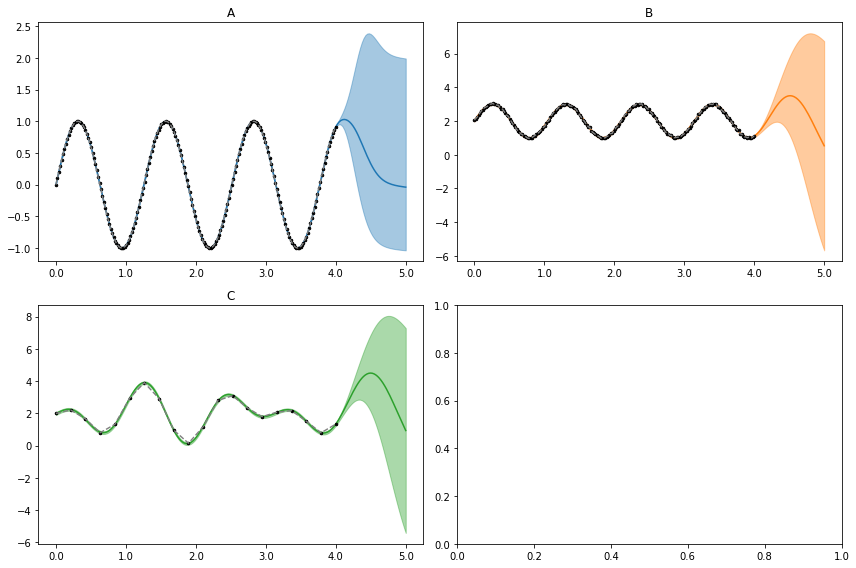

In [96]:
smlmc.predict(plot=True)

## CSM

In [97]:
csm = mogptk.CSM(data, Q=3, Rq=1)
csm.print_params()

Q=0,constant,mean,variance,phase
A,[0.825],[0.597],[0.166],[0.000]
B,[0.740],[0.597],[0.166],[0.000]
C,[0.365],[0.597],[0.166],[0.000]
Q=1,constant,mean,variance,phase
A,[0.502],[0.144],[0.680],[0.000]
B,[0.677],[0.144],[0.680],[0.000]
C,[0.270],[0.144],[0.680],[0.000]
Q=2,constant,mean,variance,phase
A,[0.295],[0.616],[0.452],[0.000]
B,[0.792],[0.616],[0.452],[0.000]


Likelihood,variance
,1.0


In [98]:
csm.estimate_params(method='BNSE')
csm.print_params()

Q=0,constant,mean,variance,phase
A,[0.130],[4.833],[0.558],[0.000]
B,[0.843],[4.833],[0.558],[0.000]
C,[1.000],[4.833],[0.558],[0.000]
Q=1,constant,mean,variance,phase
A,[0.008],[3.957],[0.869],[0.000]
B,[1.000],[3.957],[0.869],[0.000]
C,[0.872],[3.957],[0.869],[0.000]
Q=2,constant,mean,variance,phase
A,[0.009],[3.891],[1.350],[0.000]
B,[1.000],[3.891],[1.350],[0.000]


Likelihood,variance
,1.0


In [99]:
csm.train()
csm.print_params()

Done in 0.3 minutes


Q=0,constant,mean,variance,phase
A,[0.128],[0.003],[18.518],[1.000e-06]
B,[1.186e-06],[0.003],[18.518],[1.000e-06]
C,[1.003e-06],[0.003],[18.518],[1.000e-06]
Q=1,constant,mean,variance,phase
A,[4.248e-06],[3.983],[1.081e-06],[1.000e-06]
B,[0.681],[3.983],[1.081e-06],[1.000e-06]
C,[0.001],[3.983],[1.081e-06],[1.000e-06]
Q=2,constant,mean,variance,phase
A,[1.036e-05],[0.000],[4.236],[1.000e-06]
B,[11.335],[0.000],[4.236],[1.000e-06]


Likelihood,variance
,1.000000000946703e-06


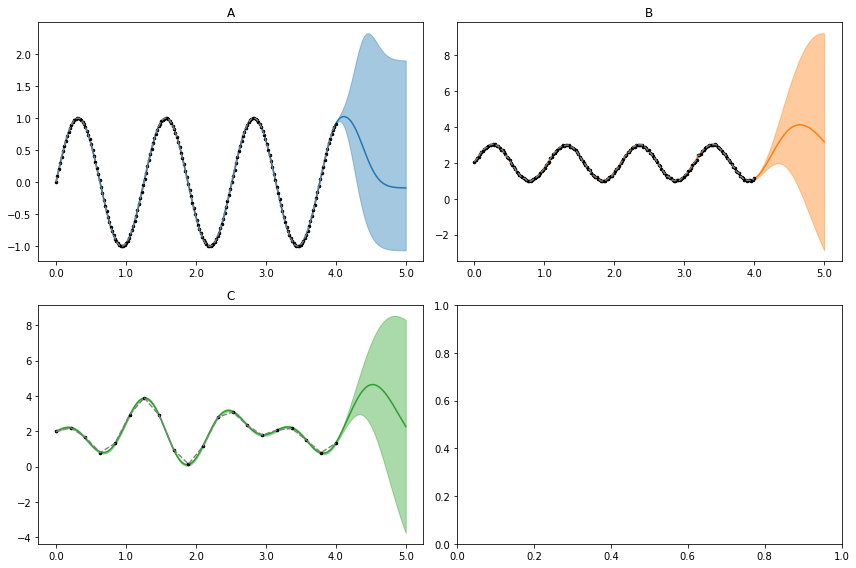

In [100]:
csm.predict(plot=True)

## CONV

In [101]:
conv = mogptk.CONV(data, Q=3)
conv.print_params()

Q=0,constant,variance
A,0.288,[0.000]
B,0.602,[0.000]
C,0.511,[0.000]
Q=1,constant,variance
A,0.287,[0.000]
B,0.641,[0.000]
C,0.600,[0.000]
Q=2,constant,variance
A,0.770,[0.000]
B,0.402,[0.000]


Likelihood,variance
,1.0


In [104]:
conv.estimate_params(method='SM')
conv.print_params()

         Current function value: -952.797177
         Iterations: 37
         Function evaluations: 127
         Gradient evaluations: 117
Done in 0.0 minutes
         Current function value: -357.263630
         Iterations: 110
         Function evaluations: 254
         Gradient evaluations: 242
Done in 0.0 minutes
         Current function value: 43.217902
         Iterations: 9
         Function evaluations: 11
         Gradient evaluations: 10
Done in 0.0 minutes


Q=0,constant,variance
A,0.000,[0.164]
B,2.589,[1.000e-06]
C,0.411,[10.355]
Q=1,constant,variance
A,0.088,[0.687]
B,2.471,[0.383]
C,0.441,[233.062]
Q=2,constant,variance
A,0.000,[232.758]
B,0.000,[170.262]


Likelihood,variance
,1.0


In [105]:
conv.train(method='Adam')
conv.print_params()

ERROR:tensorflow:==================================
Object was never used (type <class 'tensorflow.python.framework.ops.Tensor'>):
<tf.Tensor 'GPR-db1f71c7-1050/X/IsVariableInitialized:0' shape=() dtype=bool>
If you want to mark it as used call its "mark_used()" method.
It was originally created here:
  File "/home/taco/anaconda3/envs/py36/lib/python3.6/site-packages/IPython/core/interactiveshell.py", line 3346, in run_code
    return outflag  File "<ipython-input-90-b701e307c3f6>", line 1, in <module>
    smlmc = mogptk.SM_LMC(data, Q=3, Rq=1)  File "../mogptk/sm_lmc.py", line 57, in __init__
    self._build(kernel_set, likelihood, variational, sparse, like_params)  File "../mogptk/model.py", line 83, in _build
    self.model = gpflow.models.SVGP(x, y, kernel, self.likelihood)  File "</home/taco/anaconda3/envs/py36/lib/python3.6/site-packages/decorator.py:decorator-gen-177>", line 2, in __init__  File "/home/taco/anaconda3/envs/py36/lib/python3.6/site-packages/gpflow/core/compilable.p

ERROR:tensorflow:==================================
Object was never used (type <class 'tensorflow.python.framework.ops.Tensor'>):
<tf.Tensor 'SpectralMixtureLMC-24cf4358-1036/mean/IsVariableInitialized:0' shape=() dtype=bool>
If you want to mark it as used call its "mark_used()" method.
It was originally created here:
  File "/home/taco/anaconda3/envs/py36/lib/python3.6/site-packages/IPython/core/interactiveshell.py", line 3346, in run_code
    return outflag  File "<ipython-input-90-b701e307c3f6>", line 1, in <module>
    smlmc = mogptk.SM_LMC(data, Q=3, Rq=1)  File "../mogptk/sm_lmc.py", line 57, in __init__
    self._build(kernel_set, likelihood, variational, sparse, like_params)  File "</home/taco/anaconda3/envs/py36/lib/python3.6/site-packages/decorator.py:decorator-gen-196>", line 2, in __init__  File "/home/taco/anaconda3/envs/py36/lib/python3.6/site-packages/gpflow/core/compilable.py", line 157, in init_wrapper
    self.initialize(force=True)  File "/home/taco/anaconda3/envs/p

ERROR:tensorflow:==================================
Object was never used (type <class 'tensorflow.python.framework.ops.Tensor'>):
<tf.Tensor 'SpectralMixtureLMC-c0ebd459-1026/constant/IsVariableInitialized:0' shape=() dtype=bool>
If you want to mark it as used call its "mark_used()" method.
It was originally created here:
  File "/home/taco/anaconda3/envs/py36/lib/python3.6/site-packages/IPython/core/interactiveshell.py", line 3346, in run_code
    return outflag  File "<ipython-input-90-b701e307c3f6>", line 1, in <module>
    smlmc = mogptk.SM_LMC(data, Q=3, Rq=1)  File "../mogptk/sm_lmc.py", line 57, in __init__
    self._build(kernel_set, likelihood, variational, sparse, like_params)  File "</home/taco/anaconda3/envs/py36/lib/python3.6/site-packages/decorator.py:decorator-gen-196>", line 2, in __init__  File "/home/taco/anaconda3/envs/py36/lib/python3.6/site-packages/gpflow/core/compilable.py", line 157, in init_wrapper
    self.initialize(force=True)  File "/home/taco/anaconda3/en

Q=0,constant,variance
A,0.000,[0.057]
B,1.703,[1.000e-06]
C,0.219,[9.401]
Q=1,constant,variance
A,0.039,[0.373]
B,1.754,[0.271]
C,0.197,[232.175]
Q=2,constant,variance
A,0.000,[232.845]
B,0.000,[168.757]


Likelihood,variance
,0.5114430984072483


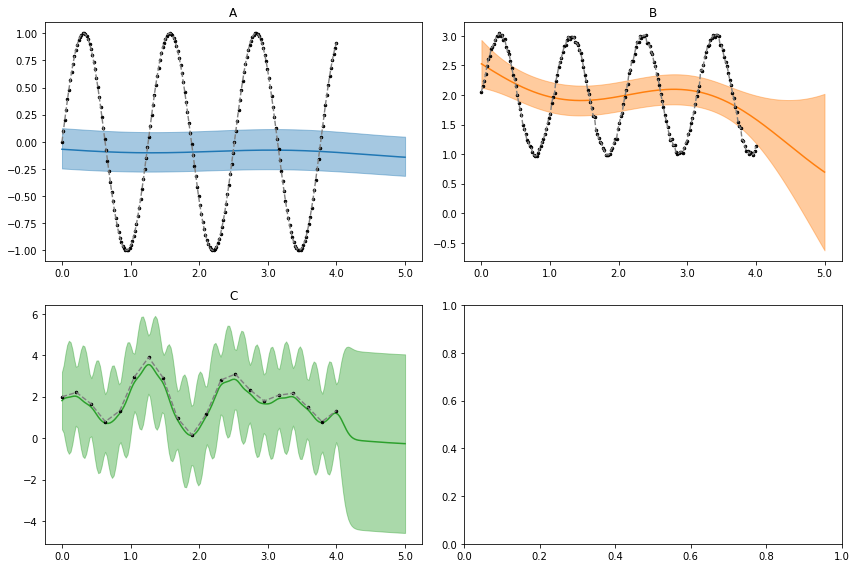

In [106]:
conv.predict(plot=True)

## Errors